In [2]:
import gymnasium as gym
from stable_baselines3 import PPO


In [ ]:
env = gym.make("HalfCheetah-v5", render_mode="human")  # Set render_mode to None for training
obs, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()  # Take random actions
    obs, reward, done, truncated, info = env.step(action)

env.close()

In [ ]:
env = gym.make("HalfCheetah-v4")
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1_000_000)
model.save("ppo_halfcheetah")


c:\Users\Rishub\anaconda3\envs\rlenv\lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -335     |
| time/              |          |
|    fps             | 2804     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -385        |
| time/                   |             |
|    fps                  | 1972        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009834007 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss   

In [3]:
model = PPO.load("ppo_halfcheetah.zip")

print(model.policy)

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=17, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=17, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=6, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)


0.5932150470088021
0.4608355687141429
-0.1425789979053997
-0.9261733098971333
-1.0740625532249077
-0.1927078233402943
-0.3065123608973458
-0.5061149526536552
0.75622177707239
0.08474201666737191
0.5493483846838972
0.1653145422303438
-0.6704446483495194
-0.04621644682655107
-0.056505625840908236
-0.5857258676915522
-0.8944891629547757
-0.15190225417758993
-0.2764394933414647
-0.8012519696449574
-0.48025126996126677
-0.5032902559340762
-1.518718422031932
-1.0218095460872998
-0.09291576484568709
-0.3327515990836819
-0.7837948193655607
-0.433727002601102
-0.05127539226297567
-0.20687975381848045
1.2325699427869201
-0.05190378073631152
0.22247348946607604
1.7946546966816252
0.9618236656650154
0.5574741926257863
1.1306117735465138
1.0111254797986864
-1.2436964191522637
0.10509970083680731
1.5949188829071157
0.44887315587720567
-0.7577494671648981
-0.8193752658043669
0.5054106726193972
-1.3888514414840634
0.18745300661730946
2.6046496561967216
2.4141522951124785
1.402956610444734
0.2052239913

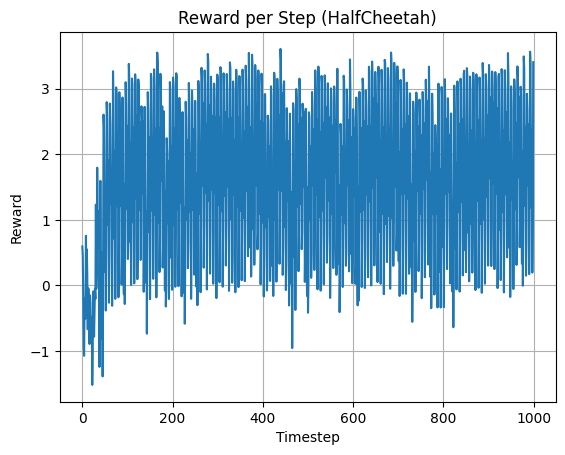

In [8]:
import matplotlib.pyplot as plt
import time
# Create the environment (no rendering)
env = gym.make("HalfCheetah-v5", render_mode="human")
obs, _ = env.reset()

# Store rewards for plotting
rewards = []

# Run the model
for _ in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    print(reward)
    rewards.append(reward)

    if done or truncated:
        obs, _ = env.reset()
    time.sleep(0.1)

env.close()

# Plot the rewards
plt.plot(rewards)
plt.title("Reward per Step (HalfCheetah)")
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.grid(True)
plt.show()
